In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB

In [2]:
salaries_df = pd.read_csv("Salaries.csv",low_memory=False)

In [3]:
salaries_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
salaries_df.count()

Id                  148654
EmployeeName        148654
JobTitle            148654
BasePay             148049
OvertimePay         148654
OtherPay            148654
Benefits            112495
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status               38119
dtype: int64

In [4]:
salaries_df['JobTitle'] = salaries_df['JobTitle'].astype('category')
#salaries_df['JobTitle'].hist()

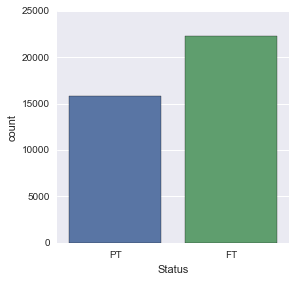

In [5]:
%matplotlib inline
sns.factorplot("Status",data=salaries_df,kind="count")

In [6]:
def remove_not_provided(Series):
    count = 0
    for i in Series:
        if i == 'Not Provided':
            Series[count] = np.nan

In [7]:
salaries_df2 = salaries_df.replace(to_replace='Not Provided',value=np.nan)

In [8]:
salaries_df2['BasePay'] = salaries_df2['BasePay'].astype('float')
salaries_df2['OvertimePay'] = salaries_df2['OvertimePay'].astype('float')
salaries_df2['OtherPay'] = salaries_df2['OtherPay'].astype('float')
salaries_df2['Benefits'] = salaries_df2['Benefits'].astype('float')
salaries_df2['Agency'] = salaries_df2['Agency'].astype('category')
#salaries_df2.info()
#salaries_df2.isnull().sum()

del salaries_df2['Notes']
del salaries_df2['EmployeeName']
salaries_df2['Benefits'].fillna(0, inplace=True)
salaries_df2['Status'].fillna('Unknown', inplace=True)
salaries_df2['Status'] = salaries_df2['Status'].astype('category')
salaries_df2.dropna(inplace=True)
salaries_df2.isnull().sum()

Id                  0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

In [9]:
salaries_df2.count()

Id                  148045
JobTitle            148045
BasePay             148045
OvertimePay         148045
OtherPay            148045
Benefits            148045
TotalPay            148045
TotalPayBenefits    148045
Year                148045
Agency              148045
Status              148045
dtype: int64

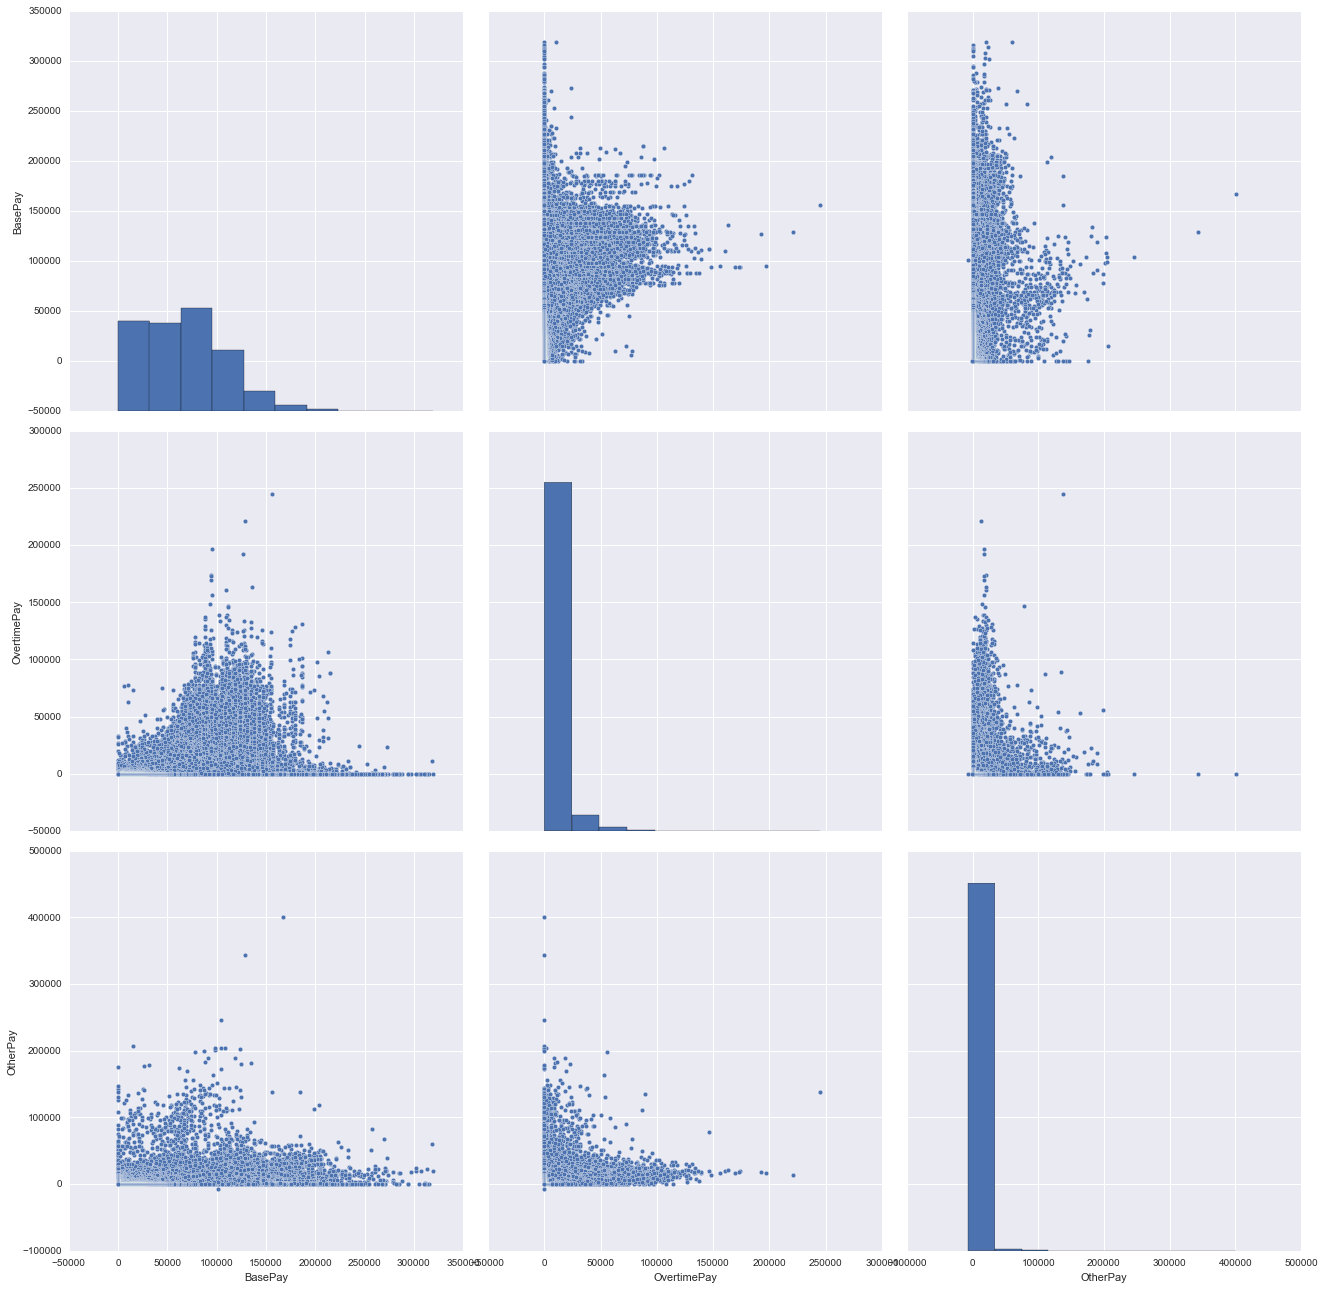

In [10]:
g = sns.pairplot(salaries_df2[['BasePay','OvertimePay','OtherPay']], palette="Set2", diag_kind="hist", size=6)

In [11]:
salaries_df2.head()

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,Unknown
1,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,Unknown
2,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,Unknown
3,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,Unknown
4,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,Unknown


In [18]:
"list of all categories"
cat = list(salaries_df2['JobTitle'].cat.categories)

"most popular job titles"
top_ten = salaries_df['JobTitle'].value_counts()[:10]
len(cat)

2159

In [15]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [13]:
CAT = []
z = []
for job in salaries_df2['JobTitle']:
    CAT.append(job.upper())
for job in cat:
    z.append(job.upper())
z[-10]

'WINDOW CLEANER SUPERVISOR'

In [16]:
df = salaries_df2[['Id','BasePay','OvertimePay','OtherPay','Benefits','Year','Status','TotalPayBenefits']]
df['JobTitle'] = CAT
df.replace(to_replace=df['JobTitle'],value=df['JobTitle'].astype('category'))
#df.isnull().sum()

C:\Users\Nachiket\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Id,BasePay,OvertimePay,OtherPay,Benefits,Year,Status,TotalPayBenefits,JobTitle
0,1,167411.18,0.00,400184.25,0.00,2011,Unknown,567595.43,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,2,155966.02,245131.88,137811.38,0.00,2011,Unknown,538909.28,CAPTAIN III (POLICE DEPARTMENT)
2,3,212739.13,106088.18,16452.60,0.00,2011,Unknown,335279.91,CAPTAIN III (POLICE DEPARTMENT)
3,4,77916.00,56120.71,198306.90,0.00,2011,Unknown,332343.61,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,5,134401.60,9737.00,182234.59,0.00,2011,Unknown,326373.19,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
5,6,118602.00,8601.00,189082.74,0.00,2011,Unknown,316285.74,ASSISTANT DEPUTY CHIEF II
6,7,92492.01,89062.90,134426.14,0.00,2011,Unknown,315981.05,"BATTALION CHIEF, (FIRE DEPARTMENT)"
7,8,256576.96,0.00,51322.50,0.00,2011,Unknown,307899.46,DEPUTY DIRECTOR OF INVESTMENTS
8,9,176932.64,86362.68,40132.23,0.00,2011,Unknown,303427.55,"BATTALION CHIEF, (FIRE DEPARTMENT)"
9,10,285262.00,0.00,17115.73,0.00,2011,Unknown,302377.73,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"


In [ ]:
"list of all categories"
cat = list(df['JobTitle'].cat.categories)

"most popular job titles"
top_ten = df['JobTitle'].value_counts()[:10]
top_ten.plot.bar()

C:\Users\Nachiket\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


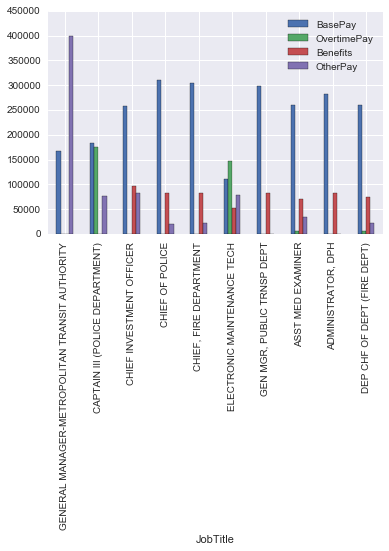

In [147]:
rich = df[df['TotalPayBenefits'] >= 300000]
rich['JobTitle'] = rich['JobTitle'].astype('category')
rich.isnull().sum()
obj = rich.groupby('JobTitle')
    richest = obj.mean().dropna().sort_values(by='TotalPayBenefits',ascending=False)
    richest[:10].plot(y = ['BasePay','OvertimePay','Benefits','OtherPay'],kind='bar')

# Naive Bayes with cross-validation

In [182]:
df.head()
#del df['Year']
df.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,Status,TotalPayBenefits,JobTitle
0,1,167411.18,0.00,400184.25,0.0,Unknown,567595.43,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,2,155966.02,245131.88,137811.38,0.0,Unknown,538909.28,CAPTAIN III (POLICE DEPARTMENT)
2,3,212739.13,106088.18,16452.60,0.0,Unknown,335279.91,CAPTAIN III (POLICE DEPARTMENT)
3,4,77916.00,56120.71,198306.90,0.0,Unknown,332343.61,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,5,134401.60,9737.00,182234.59,0.0,Unknown,326373.19,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"


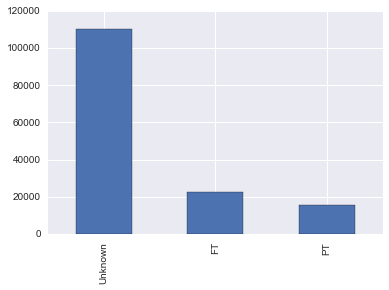

In [184]:
df.Status.astype('category').value_counts().plot(kind='bar')

In [189]:
df.iloc[0]

Id                                                               1
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                         0
Status                                                     Unknown
TotalPayBenefits                                            567595
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: 0, dtype: object

In [235]:
#K fold cross-validation
folds = cross_validation.KFold(len(df),n_folds=10)

In [236]:
scores = []
for train, test in folds:
    train_df = df.iloc[train]
    test_df  = df.iloc[test]
    
    X = np.array(train_df[['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']])
    y = np.array(train_df['JobTitle'])
    clf = GaussianNB()
    clf.fit(X, y)
    Xtest = np.array(test_df[['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']])
    ytest = np.array(test_df['JobTitle'])
    scores.append(clf.score(Xtest,ytest))
sum(scores)/len(scores)

0.079374829187616985

In [259]:
def effect_of_k_on_scores(kmax):
    kdf = pd.DataFrame(columns=['k','avg_score'])
    kdf['k'] = range(2,kmax+1)
    for i in range(2,kmax+1):
        #K fold cross-validation
        folds = cross_validation.KFold(len(df),n_folds=i)
        
        #Naive Bayes on each fold
        scores = []
        for train, test in folds:
            train_df = df.iloc[train]
            test_df  = df.iloc[test]

            X = np.array(train_df[['BasePay','OvertimePay','OtherPay']])
            y = np.array(train_df['JobTitle'])
            clf = GaussianNB()
            clf.fit(X, y)
            Xtest = np.array(test_df[['BasePay','OvertimePay','OtherPay']])
            ytest = np.array(test_df['JobTitle'])
            scores.append(clf.score(Xtest,ytest))
        print scores
        kdf['avg_score'] = sum(scores)/len(scores)
    return kdf

In [258]:
#kdf = effect_of_k_on_scores(5)
#kdf